In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

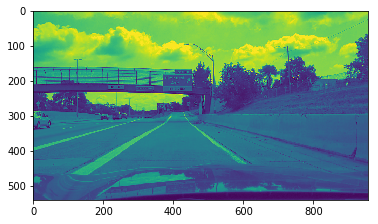

In [13]:
image = cv2.imread('new_test_image_3.jpg')
image_gray =cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray)
plt.show()

# Gaussian Blurring and Canny Edge Detection

In [14]:
image_blurred = cv2.GaussianBlur(image_gray,(7,7),0)
threshold_low = 10
threshold_high = 200
image_canny =cv2.Canny(image_blurred,threshold_low,threshold_high)
cv2.imshow('Canny Edge Detection',image_canny)
cv2.waitKey()
cv2.destroyAllWindows()

# Define Region of Interest

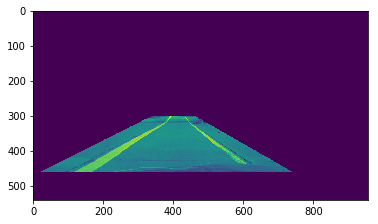

In [25]:
ROI = np.array([[(20,460),(340,300),(460,300),(740,460)]],dtype=np.int32)
mask = np.zeros_like(image_gray)
cv2.fillPoly(mask,ROI,255)
image_masked = cv2.bitwise_and(image_gray,mask)
plt.imshow(image_masked)
plt.show()

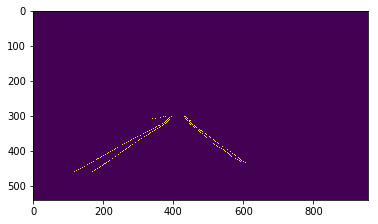

In [26]:
image_masked = cv2.bitwise_and(image_canny,mask)
plt.imshow(image_masked)
plt.show()

# Hough Lines Detection and Draw Function

In [39]:
rho = 2   #distance resolution in pixels
theta = np.pi/180  #minimum resolution in radian
threshold =40   #minimum number of votes
min_line_len = 100 #minimum  number of pixels making up a line
max_line_gap = 50  #minimum gap in pixels between connectable line segments
lines = cv2.HoughLinesP(image_masked,rho,theta,threshold,np.array([]),minLineLength = min_line_len,maxLineGap=min_line_gap)
#Create an empty blank image 
line_image = np.zeros((image_masked.shape[0],image_masked.shape[1],3),dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),[0,0,255],20)
lines

array([[[169, 460, 387, 313]],

       [[142, 447, 284, 366]],

       [[423, 304, 608, 433]],

       [[418, 303, 576, 422]],

       [[270, 390, 378, 322]],

       [[153, 442, 294, 361]],

       [[227, 422, 369, 323]],

       [[480, 342, 592, 423]]], dtype=int32)

In [40]:
alpha = 1
beta =1
gama =0

#merging detected lanes with original image
image_with_lanes = cv2.addWeighted(image,alpha,line_image,beta,gama)
cv2.imshow('Image with Lanes',image_with_lanes)
cv2.waitKey()
cv2.destroyAllWindows()